In [1]:
#April_6th_Online_shopping

Online shopping Customer Segmentation

**Problem statement**
-  # calculate the customer  Value
-  1: Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 
-  2: Segment (Group/Cluster) Identify trends for Day, Month, Season, Time by Invoice count
-  3.Top 10 selling product 
-  4 Best product at country level.
-  5 Recommendation 
   6 FINDING CUSTOMER VALUATION.
-  

Recency, frequency, monetary value (RFM) is a model used in marketing 
analysis that segments a company’s consumer base by their purchasing 
patterns or habits. In particular, it evaluates customers’ recency 
(how long ago they made a purchase), frequency (how often they make purchases), 
and monetary value (how much money they spend).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
original_data=pd.read_excel("Online_shopping.xlsx")

In [4]:
df=original_data.copy()
df.head(100)

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
95,536378,22352,lunch box with cutlery retrospot,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,pack of 72 retrospot cake cases,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,pack of 60 dinosaur cake cases,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,pack of 60 pink paisley cake cases,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


In [5]:
df["Country"].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [6]:
# please do plot some visualization 

In [7]:
# data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   lower        1816 non-null    object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   InvoiceDate  541909 non-null  datetime64[ns]
 6   UnitPrice    541909 non-null  float64       
 7   CustomerID   406829 non-null  float64       
 8   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [9]:
# problem no. 1:-Segment (Group/Cluster) customer on basis of RFM (Recency, Frequency, Monetary) 

In [10]:
# drop the columns which are not significant for the above problem statement no. 1

In [11]:
df1=df.drop(["StockCode","Description","lower","Country"],axis=1)
df1.head(1)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0


In [12]:
df1.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [13]:
# Customer ID bringsimp information , which can not be retrive once missing.
# we have to drop the missing value where cust. ID is missing

In [14]:
df1.dropna(axis=0,inplace=True)

In [15]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [16]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


In [17]:
# Quantity is negative because some customer has returned the item(defective).
# Unit price is zero because it all are free items.

In [18]:
# finding the rows having unit price 0 items available

In [19]:
df1[df1["UnitPrice"]==0]["UnitPrice"].count()

40

In [20]:
df1[df1["UnitPrice"]==0].head(10)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
9302,537197,1,2010-12-05 14:02:00,0.0,12647.0
33576,539263,4,2010-12-16 14:36:00,0.0,16560.0
40089,539722,10,2010-12-21 13:45:00,0.0,14911.0
47068,540372,24,2011-01-06 16:41:00,0.0,13081.0
47070,540372,24,2011-01-06 16:41:00,0.0,13081.0
56674,541109,1,2011-01-13 15:10:00,0.0,15107.0
86789,543599,16,2011-02-10 13:08:00,0.0,17560.0
130188,547417,36,2011-03-23 10:25:00,0.0,13239.0
139453,548318,5,2011-03-30 12:45:00,0.0,13113.0
145208,548871,2,2011-04-04 14:42:00,0.0,14410.0


In [21]:
df1.head(2)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [22]:
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0


In [23]:
# we are considering return as --NO business but we are not dropping those customers 

In [24]:
df1=df1[df1["Quantity"]>0]

In [25]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [26]:
# create a column Total=qty x unit price

In [27]:
df1["Total"]=df1["Quantity"]*df1["UnitPrice"]
df1.head(100)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
95,536378,6,2010-12-01 09:37:00,2.55,14688.0,15.30
96,536378,120,2010-12-01 09:37:00,0.42,14688.0,50.40
97,536378,24,2010-12-01 09:37:00,0.55,14688.0,13.20
98,536378,24,2010-12-01 09:37:00,0.55,14688.0,13.20


In [28]:
# now drop  qty and unit price 

In [29]:
df2=df1.drop(["Quantity","UnitPrice"],axis=1)
df2.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34


In [30]:
df_final=df2.groupby(["InvoiceNo","InvoiceDate","CustomerID"]).agg({"Total":"sum"}).reset_index()

In [31]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [33]:
# Goal 1:- performing customer segmentation on the basis of R F M

In [34]:
# calculate the last date and recent date of the dataset

In [35]:
max(df_final["InvoiceDate"])

Timestamp('2011-12-09 12:50:00')

In [36]:
min(df_final["InvoiceDate"])

Timestamp('2010-12-01 08:26:00')

In [37]:
# the given dataset belongs  Dec 1st 2010 to Dec 9th 2011

In [38]:
# set the last date as benchmark by adding +1 day extra

In [39]:
import datetime as dt
latest_date=dt.datetime(2011,12,10)
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

# by keeping reference as customer id
1.Recency - difference between last invoice date and latest date
2.Frequency-Counts of invoice no.( how many times the Cust ID appear)
3.Monetary-sum of total- from total column.

In [40]:
RFM_Score=df_final.groupby("CustomerID").agg({"InvoiceDate":lambda x:(latest_date-x.max()).days,
                                             "InvoiceNo":lambda x:x.count(),
                                             "Total":lambda x:x.sum()}).reset_index()

In [41]:
# we are calculating recency, frequency , monetary under the columns of invoice date,invoice no.total

In [42]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [43]:
# rename the column name
RFM_Score=RFM_Score.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","Total":"Monetary"})

In [44]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


# Calculate the marks on the basis of  R , F ,M

Pandas Dataframe.rank() method returns a rank of every respective 
index of a series passed. The rank is returned on the basis of 
position after sorting.
Syntax:
DataFrame.rank(axis=0, method=’average’, numeric_only=None, 
               na_option=’keep’, ascending=True, pct=False)

Parameters:
axis: 0 or ‘index’ for rows and 1 or ‘columns’ for Column.
method: Takes a string input(‘average’, ‘min’, ‘max’, ‘first’, ‘dense’) which tells pandas what to do with same values. Default is average which means assign average of ranks to the similar values.
numeric_only: Takes a boolean value and the rank function works on non-numeric value only if it’s False.
na_option: Takes 3 string input(‘keep’, ‘top’, ‘bottom’) to set position of Null values if any in the passed Series.
ascending: Boolean value which ranks in ascending order if True.
pct: Boolean value which ranks percentage wise if True.

In [45]:
RFM1=RFM_Score.copy()

In [46]:
# recency Marks

In [47]:
RFM1["R_marks"]=RFM1["Recency"].rank(ascending=False)

In [48]:
RFM1["R_marks"]

0        162.5
1       4156.5
2       1646.0
3       3209.5
4        227.5
         ...  
4334     355.0
4335     860.0
4336    3839.5
4337    4064.5
4338    2357.0
Name: R_marks, Length: 4339, dtype: float64

In [49]:
#RFM1["R_rank"]=RFM1["Recency"].rank(ascending=False)

In [50]:
#Frequency Mark

In [51]:
RFM1["F_marks"]=RFM1["Frequency"].rank(ascending=True)


In [52]:
RFM1["F_marks"]

0        746.5
1       3709.5
2       3028.0
3        746.5
4        746.5
         ...  
4334     746.5
4335     746.5
4336    1910.5
4337    4182.5
4338    2581.5
Name: F_marks, Length: 4339, dtype: float64

In [53]:
RFM_Score.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [54]:
#Monetary Mark

In [55]:
RFM1["M_marks"]=RFM1["Monetary"].rank(ascending=True)


In [56]:
RFM1["M_marks"]

0       4330.0
1       4004.0
2       3334.0
3       3306.0
4       1230.0
         ...  
4334     564.0
4335     105.0
4336     547.0
4337    3489.0
4338    3357.0
Name: M_marks, Length: 4339, dtype: float64

In [57]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0


In [58]:
# percentage marks Recency

In [59]:
RFM1["R_final"]=(RFM1["R_marks"]/RFM1["R_marks"].max())*100


In [60]:
RFM1["R_final"]

0        3.759833
1       96.170754
2       38.084220
3       74.259602
4        5.263767
          ...    
4334     8.213790
4335    19.898195
4336    88.836187
4337    94.042110
4338    54.534938
Name: R_final, Length: 4339, dtype: float64

In [61]:
# percentage marks Frquency

In [62]:
RFM1["F_final"]=(RFM1["F_marks"]/RFM1["F_marks"].max())*100


In [63]:
RFM1["F_final"]

0       17.204425
1       85.492049
2       69.785665
3       17.204425
4       17.204425
          ...    
4334    17.204425
4335    17.204425
4336    44.030883
4337    96.393178
4338    59.495275
Name: F_final, Length: 4339, dtype: float64

In [64]:
#percentage Marks Monetary

In [65]:
RFM1["M_final"]=(RFM1["M_marks"]/RFM1["M_marks"].max())*100

In [66]:
RFM1["M_final"]

0       99.792579
1       92.279327
2       76.837981
3       76.192671
4       28.347546
          ...    
4334    12.998387
4335     2.419912
4336    12.606591
4337    80.410233
4338    77.368057
Name: M_final, Length: 4339, dtype: float64

In [67]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_marks,F_marks,M_marks,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546


In [68]:
RFM1.drop(columns=["R_marks","F_marks","M_marks"],inplace=True)


In [69]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546


In [70]:
#Final Marks as per weightage on R , F ,M

In [71]:
RFM1["RFM_SUM"]=0.15*RFM1["R_final"]+0.30*RFM1["F_final"]+0.60*RFM1["M_final"]

In [72]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [73]:
RFM1=RFM1.round(2)

In [74]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [75]:
# segmentation of customers in 4 groups-silver,gold,diamond, platinum

In [76]:
loyality_label=["Silver","Gold","Diamond","Platinum"]

In [77]:
quant100=RFM1["RFM_SUM"].quantile(q=[0.25,0.50,0.75])

In [78]:
quant100

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_SUM, dtype: float64

In [79]:
max(RFM1["RFM_SUM"])

104.92

In [80]:
min(RFM1["RFM_SUM"])

5.36

<AxesSubplot:xlabel='RFM_SUM', ylabel='Proportion'>

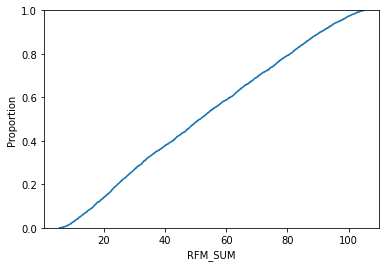

In [81]:
import seaborn as sns
sns.ecdfplot(data=RFM1["RFM_SUM"])

In [82]:
# assign the loyality label as per percentile

In [83]:
def loyality(X):
    if X<=28:
        return "Silver"
    elif X<=51:
        return "Gold"
    elif X<=76:
        return "Diamond"
    else:
        return "Platinum"

In [84]:
RFM1["Loyality"]=RFM1["RFM_SUM"].apply(loyality)

In [85]:
RFM1

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver
...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,8.21,17.20,13.00,14.19,Silver
4335,18281.0,180,1,80.82,19.90,17.20,2.42,9.60,Silver
4336,18282.0,7,2,178.05,88.84,44.03,12.61,34.10,Gold
4337,18283.0,3,16,2094.88,94.04,96.39,80.41,91.27,Platinum


In [86]:
RFM1["Loyality"].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [87]:
# segmentation -apply KMEANS algorithm

In [88]:
Newdata=RFM1["RFM_SUM"]
Newdata.head()
pd.DataFrame(Newdata)

,RFM_SUM
0,65.60
1,95.44
2,72.75
3,62.02
4,22.96
...,...
4334,14.19
4335,9.60
4336,34.10
4337,91.27


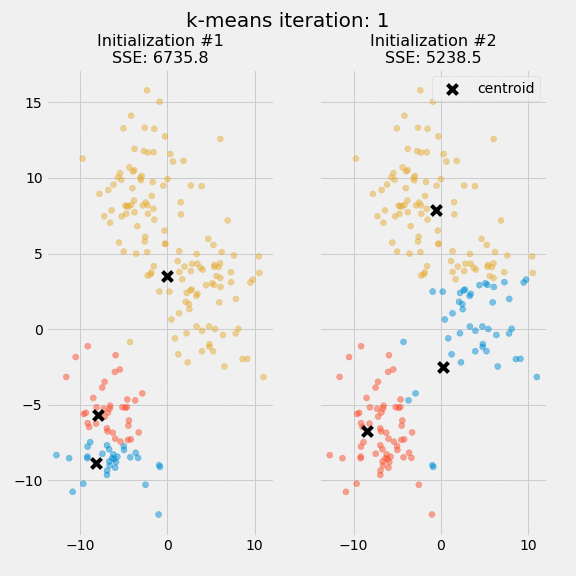

In [89]:
from sklearn.cluster import KMeans

In [90]:
kmeans1=KMeans(max_iter=100,random_state=10,n_clusters=4)
y_means=kmeans1.fit_predict(pd.DataFrame(Newdata))
y_means

array([3, 0, 3, ..., 1, 0, 3])

In [91]:
RFM1["CLUSTER"]=kmeans1.labels_
RFM1

,CustomerID,Recency,Frequency,Monetary,R_final,F_final,M_final,RFM_SUM,Loyality,CLUSTER
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,8.21,17.20,13.00,14.19,Silver,2
4335,18281.0,180,1,80.82,19.90,17.20,2.42,9.60,Silver,2
4336,18282.0,7,2,178.05,88.84,44.03,12.61,34.10,Gold,1
4337,18283.0,3,16,2094.88,94.04,96.39,80.41,91.27,Platinum,0


In [92]:
RFM1["CLUSTER"].value_counts()

2    1250
1    1107
3    1039
0     943
Name: CLUSTER, dtype: int64

In [93]:
RFM1["Loyality"].value_counts()

Diamond     1101
Gold        1098
Platinum    1080
Silver      1060
Name: Loyality, dtype: int64

In [94]:
# simple approach to find the best no. of cluster
#elbow approach

Text(0, 0.5, 'sum of square error')

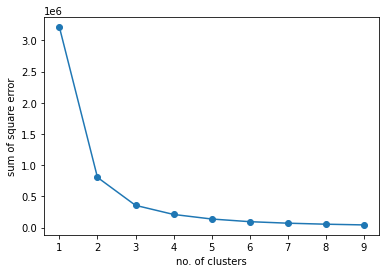

In [95]:
SSE=[]
for i in range(1,10):
    kmeans1=KMeans(max_iter=100,random_state=10,n_clusters=i)
    kmeans1.fit_predict(pd.DataFrame(Newdata))
    SSE.append(kmeans1.inertia_)
    
plt.plot(range(1,10),SSE,marker="o")
plt.xlabel("no. of clusters")
plt.ylabel("sum of square error")

In [96]:
#another approach yellowbrick
#pip install yellowbrick

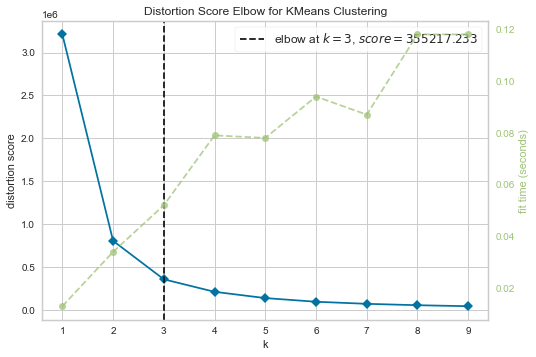

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
from yellowbrick.cluster import KElbowVisualizer
model=kmeans1
visualizer=KElbowVisualizer(model,k=(1,10)).fit(pd.DataFrame(Newdata))
visualizer.show()

In [98]:
# evaluation of clustering

In [99]:
from sklearn.metrics import silhouette_score

In [100]:
labels=kmeans1.labels_
silhouette_score(pd.DataFrame(Newdata),labels)

0.5413364899477818

# Goal no.2 Analysing the sales trend

In [101]:
df_final.head()

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85


In [102]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18566 entries, 0 to 18565
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    18566 non-null  int64         
 1   InvoiceDate  18566 non-null  datetime64[ns]
 2   CustomerID   18566 non-null  float64       
 3   Total        18566 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 580.3 KB


In [103]:
import datetime as dt

In [104]:
# extraction of day, month,hour,day_name, month_name.. etc from invoicedate column

In [105]:
df_final1=df_final.copy()

In [106]:
df_final1["Day"]=df_final1["InvoiceDate"].dt.day_name()

In [107]:
df_final1.head(2)

,InvoiceNo,InvoiceDate,CustomerID,Total,Day
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday


In [108]:
df_final1["Day"].value_counts()

Thursday     4038
Wednesday    3462
Tuesday      3189
Monday       2865
Friday       2835
Sunday       2177
Name: Day, dtype: int64

In [109]:
df_final1["Month"]=df_final1["InvoiceDate"].dt.month
df_final1["Hour"]=df_final1["InvoiceDate"].dt.hour
df_final1["Month_name"]=df_final1["InvoiceDate"].dt.month_name()

In [110]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Month_name
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,December
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,December
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,December
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,December
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,December


In [111]:
df_final1["Week_info"]=np.where((df_final1.Day=="Saturday")|(df_final1.Day=="Sunday"),"Weekend","Weekday")

In [112]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Month_name,Week_info
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,December,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,December,Weekday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,December,Weekday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,December,Weekday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,December,Weekday


In [113]:
# function to create season and timing 

In [114]:
def cal_season(X):
    if X in[10,11,12,1]:
        return "Winter"
    if X in [2,3]:
        return "spring"
    if X in[4,5,6]:
        return "summer"
    else:
        return "Monsoon"

In [115]:
def cal_timing(X):
    if X in[4,5,6]:
        return "early morning"
    if X in [7,8,9,10,11]:
        return "Morning"
    if X in[12,13,14,15,16]:
        return "afternoon"
    else:
        return "evening"

In [116]:
df_final1["season"]=df_final1["Month"].apply(cal_season)

In [117]:
df_final1["Time"]=df_final1["Hour"].apply(cal_timing)

In [118]:
df_final1.head()

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Month_name,Week_info,season,Time
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,December,Weekday,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,December,Weekday,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,December,Weekday,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,December,Weekday,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,December,Weekday,Winter,Morning


In [119]:
df_final1["Time"].value_counts()

afternoon        11200
Morning           6488
evening            877
early morning        1
Name: Time, dtype: int64

In [120]:
df_final1["Time"].head(100)

0       Morning
1       Morning
2       Morning
3       Morning
4       Morning
        ...    
95    afternoon
96    afternoon
97    afternoon
98    afternoon
99    afternoon
Name: Time, Length: 100, dtype: object

In [121]:
df_final1["season"].value_counts()

Winter     7762
Monsoon    4371
summer     4106
spring     2327
Name: season, dtype: int64

In [122]:
df_final1["Month_name"].value_counts()

November     2660
December     2179
October      1930
September    1757
May          1559
June         1394
July         1331
March        1324
August       1283
April        1153
February     1003
January       993
Name: Month_name, dtype: int64

In [123]:
df_final1["Week_info"].value_counts()

Weekday    16389
Weekend     2177
Name: Week_info, dtype: int64

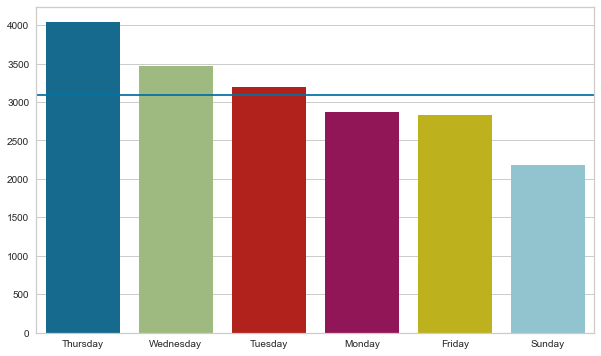

In [124]:
# plot number of customer by day graph
day=df_final1["Day"].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(day.index,day.values)
# plot a average line
plt.axhline(y=day.mean())

In [125]:
# please do plot graphs and clusters as per timing, day,season,weektype
#draw different trend graph

# Recommendation Engine

# Collaborative Filtering approach

In [126]:
df100=original_data.copy()

In [127]:
df100.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [128]:
df100.isnull().sum()

InvoiceNo           0
StockCode           0
lower          540093
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [129]:
df100=df100.drop(["lower"],axis=1)

In [130]:
df100.dropna(axis=0,inplace=True)

In [131]:
df100.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [132]:
df100.shape

(406829, 8)

In [134]:
custID_matrix=df100.pivot_table(index="CustomerID",columns="StockCode",aggfunc="sum",values="Quantity")

In [135]:
custID_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [136]:
custID_matrix.tail(100)

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
18155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
custID_matrix.shape

(4372, 3684)

In [ ]:
# apply the mapping to change Nan as 0

In [138]:
custID_matrix=custID_matrix.applymap(lambda x:1 if x>0 else 0)

In [139]:
custID_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we want to see the similarity or filtration of item as per Cutomer ID

In [140]:
from sklearn.metrics.pairwise import cosine_similarity

In [141]:
similarity=cosine_similarity(custID_matrix)

In [142]:
similarity.shape

(4372, 4372)

In [143]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.06302187, ..., 0.11377602, 0.10936441,
        0.01282789],
       [0.        , 0.06302187, 1.        , ..., 0.        , 0.17090475,
        0.08326911],
       ...,
       [0.        , 0.11377602, 0.        , ..., 1.        , 0.01780047,
        0.        ],
       [0.        , 0.10936441, 0.17090475, ..., 0.01780047, 1.        ,
        0.09633351],
       [0.        , 0.01282789, 0.08326911, ..., 0.        , 0.09633351,
        1.        ]])

In [144]:
similarity[90]

array([0.        , 0.08549917, 0.09249946, ..., 0.        , 0.16720631,
       0.        ])

In [145]:
sorted(similarity[90],reverse=True)

[0.9999999999999998,
 0.39852669849304295,
 0.3360672201667223,
 0.3076976944152481,
 0.2878618594532406,
 0.2840286409986906,
 0.2733066872302625,
 0.27136385947023145,
 0.2608969660436018,
 0.260359587582133,
 0.26035958758213296,
 0.2585177720346051,
 0.25788600255038785,
 0.2510482226267169,
 0.2487027691989384,
 0.24549951047446422,
 0.23335334047877915,
 0.23157109275259727,
 0.228629598286551,
 0.2259355204958592,
 0.22389255735252045,
 0.22348267517713433,
 0.22140372138502384,
 0.21917850187980234,
 0.21917850187980234,
 0.2172315411805112,
 0.21713578721419133,
 0.21505687158090042,
 0.21397888548644758,
 0.21363273446095687,
 0.21257273055451176,
 0.2120181879653131,
 0.20745595841899625,
 0.20567663600479225,
 0.20487876571761976,
 0.20466441859899687,
 0.20372992503051973,
 0.20239529495936104,
 0.20094315430117096,
 0.19916050364005933,
 0.1989622153591507,
 0.19664040749943115,
 0.19622098205031857,
 0.19489887528440333,
 0.19480930197663146,
 0.19473101465156206,
 0.194

In [146]:
final=pd.DataFrame(similarity)

In [148]:
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
4369,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000
4370,0.0,0.109364,0.170905,0.137124,0.044866,0.072870,0.0,0.113354,0.034204,0.093170,...,0.0,0.0,0.017102,0.043602,0.000000,0.000000,0.046613,0.017800,1.000000,0.096334


In [ ]:
# we need to replace the cust Id at rows and columns

In [149]:
final.columns=custID_matrix.index

In [150]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [151]:
final["CustomerID"]=custID_matrix.index

In [152]:
final.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0,CustomerID
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,12346.0
1,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.054656,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828,12347.0
2,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.118262,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269,12348.0
3,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475,12349.0
4,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000,12350.0


In [153]:
final=final.set_index("CustomerID")

In [154]:
final

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038814,0.0,0.025876,0.136641,0.094742,...,0.0,0.0,0.054656,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027995,0.0,0.027995,0.118262,0.146427,...,0.0,0.0,0.118262,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.138314,0.0,0.030737,0.032461,0.144692,...,0.0,0.0,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031846,0.0,0.000000,0.000000,0.033315,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037905,0.0,0.000000,0.160128,0.079305,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


In [ ]:
# above matrix is the degree of similarity among customers- we can use in Recomendation purpose

In [ ]:
# for example reference cust Id 12350

In [155]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
12814.0    0.171499
             ...   
14869.0    0.000000
14870.0    0.000000
14873.0    0.000000
14875.0    0.000000
18287.0    0.000000
Name: 12350.0, Length: 4372, dtype: float64

In [157]:
Item_customer_A=set(custID_matrix.loc[12350.0].iloc[custID_matrix.loc[12350.0].to_numpy().nonzero()].index)

In [158]:
Item_customer_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [159]:
Item_customer_B=set(custID_matrix.loc[17935.0].iloc[custID_matrix.loc[17935.0].to_numpy().nonzero()].index)

In [160]:
Item_customer_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [161]:
Recommended_item_list_Cust_A=Item_customer_B-Item_customer_A

In [162]:
Recommended_item_list_Cust_A

{20657,
 20659,
 20828,
 20856,
 21051,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22553,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B'}